In [19]:
import os
import sys 

import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import tensorflow as tf
from keras import backend as K
from skimage import io
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    img_to_array,
    load_img
)

from data_generator_3d import *
from cnn_baseline import *

print(tf.__version__)

1.14.0


In [2]:
image_generator = ImageDataGenerator(
#     rotation_range=90,
    rescale=1./255,
# #     shear_range=.1,
#     zoom_range=.15,
#     brightness_range=[.85, 1.0],
#     horizontal_flip=True,
#     vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.0
)

label_generator = ImageDataGenerator(
    validation_split=0.0
)

# train_generator = image_generator.flow_from_directory(
#     directory="data/nlst_train/image_full",
#     color_mode="grayscale",
#     target_size=(256, 256),
#     batch_size=12,
#     class_mode="binary",
#     shuffle=True,
#     seed=42
# )

# train_generator = image_generator.flow_from_directory(
#     directory="data/nlst_train/image_roi_2d",
#     color_mode="grayscale",
#     target_size=(32, 32),
#     batch_size=16,
#     class_mode="binary",
#     shuffle=True,
#     seed=42
# )

train_generator = generator(
    base_directory='data/nlst_train/image_roi_3d',
    input_gen=image_generator,
    target_gen=label_generator,
    batch_sz=2
    
)

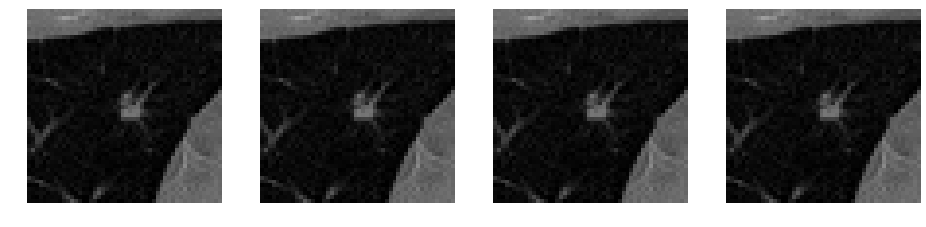

In [3]:
show_augmentation('data/nlst_train/image_roi_3d/25/5.tif', image_generator, n_rows=1)

In [4]:
def convert_to_logits(y_pred):
    y_pred = tf.clip_by_value(
        y_pred, tf.keras.backend.epsilon(),
        1 - tf.keras.backend.epsilon()
    )

    return tf.math.log(y_pred / (1 - y_pred))


def weighted_cross_entropy(y_true, y_pred):
    y_pred = convert_to_logits(y_pred)
    loss = tf.nn.weighted_cross_entropy_with_logits(
        logits=y_pred,
        labels=y_true,
        pos_weight=100
    )
    return tf.reduce_mean(loss)

In [5]:
# model = cnn_baseline()
# model = cnn_baseline(input_shape=(32, 32, 1))
model = cnn_baseline_3d(input_shape=(50, 50, 50, 1))

model.compile(
    optimizer = tf.keras.optimizers.Adam(lr = 1e-5),
#     loss=tf.keras.losses.binary_crossentropy,
    loss=weighted_cross_entropy,
    metrics = [
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC(),
        tf.keras.metrics.SpecificityAtSensitivity(.5),
    ]
)
# model_checkpoint = ModelCheckpoint(MODEL_NAME, monitor='loss',verbose=0, save_best_only=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model_history = model.fit_generator(
    train_generator,
    steps_per_epoch=500,
    epochs = 15
)

Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Epoch 1/15
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belonging to 1 classes.
Found 1182 images belon

KeyboardInterrupt: 

In [ ]:
for i in os.listdir()
with open(f'{pid_roi_3d_path}/{im}.pkl', 'rb') as input_file:
        cube = pkl.load(input_file)

In [ ]:
preds = model.predict_generator(test_generator, steps=181)

In [ ]:
labels = test_generator.classes

In [ ]:
preds

In [ ]:
roc_auc_score(labels, preds)

In [ ]:
np.array([[0]]).shape

In [ ]:
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    img_to_array,
    load_img
)
from skimage.io import imread, imsave
from PIL import Image

In [ ]:
load_img('data/nlst_train/image_roi_3d/label/545.tif')

In [ ]:
imread('data/nlst_train/image_roi_3d/label/545.tif')

In [ ]:
imsave('test.tif', np.array(Image.fromarray(np.array([[0]]), 'L')))

In [ ]:
load_img('test.tif')

In [21]:
table_path='data/nlst_table_cleaned.csv'
df_nlst = pd.read_csv(table_path)
df_recurr = df_nlst[['pid', 'recurrence']].drop_duplicates()

RecurTable = {pid: recurr for _, (pid, recurr) in df_recurr.iterrows()}

In [35]:
Xs = []
Ys = []
for pid in os.listdir('data/nlst_rois_3d'):
    pid_roi_3d_path = f'data/nlst_rois_3d/{pid}'
    for im in os.listdir(pid_roi_3d_path):
        with open(f'{pid_roi_3d_path}/{im}', 'rb') as input_file:
            cube = pkl.load(input_file)[:50][:50][:50]
            
            Xs.append(np.array(cube).reshape(50, 50, 50, 1))
            Ys.append(RecurTable[int(pid)])

ValueError: cannot reshape array of size 112500 into shape (50,50,50,1)

In [31]:
Xs = np.array(Xs)
Ys = np.array(Ys)

In [32]:
Xs.reshape(780, 50, 50, 50, 1)

ValueError: cannot reshape array of size 780 into shape (780,50,50,50,1)

In [27]:
Xs[0].shape

(50, 50, 50)